In [1]:
from utils.task3_utils import *
from utils.task4_utils import *

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from kmodes.kmodes import KModes
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, BisectingKMeans

# Dataset 1: Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
dataset = 'breast_cancer'
df, target, num_classes = load_data(name=dataset, normalize=False)

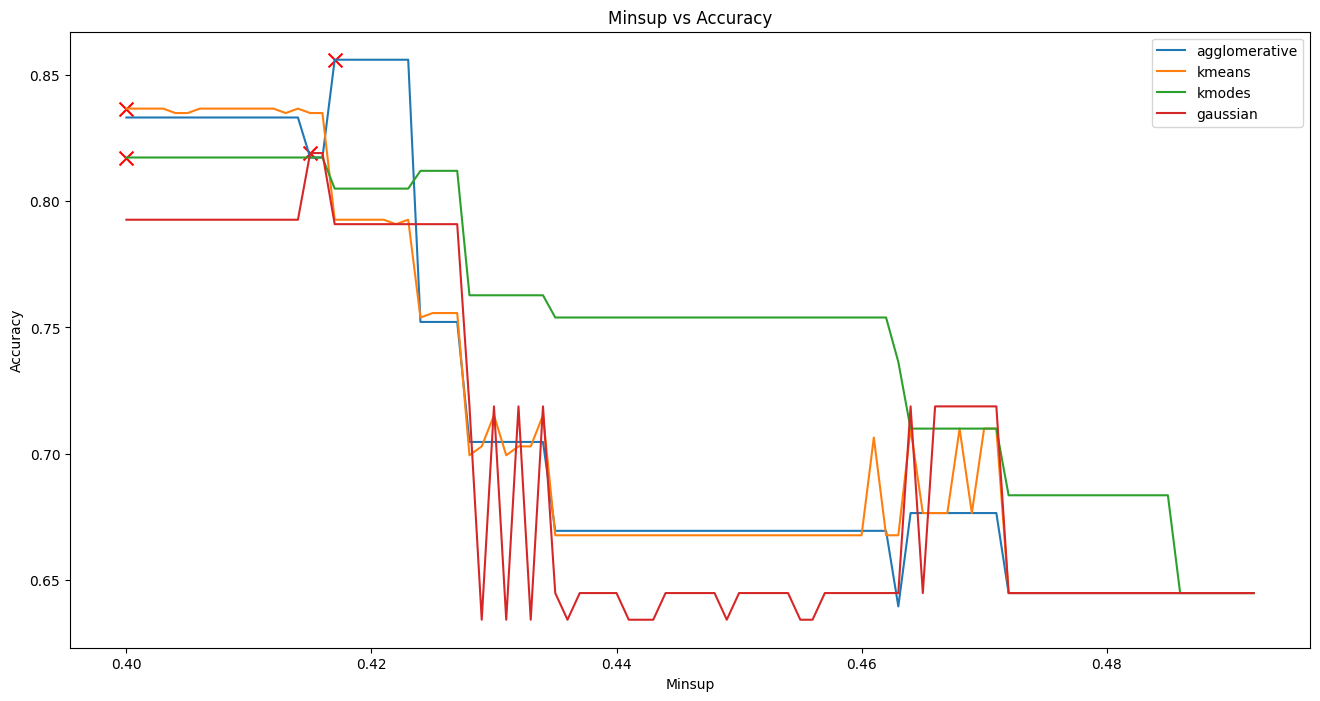

Best minsup found: 0.417



In [3]:
algos = ['agglomerative', 'kmeans', 'kmodes', 'gaussian']
minsup_values = np.arange(0.4, 0.8+0.2, 0.001)
best_minsup = tune_minsup(df, target, num_classes, minsup_values, algos)
print(f'Best minsup found: {best_minsup}\n')

Dataset:	breast_cancer
Num. classes:	2
Num. features:	30
Num. freq-itemsets:	10

Accuracy for voting classifier:	0.7961

V measure Score:	0.2738
Homogeneity Score:	0.2682
Completeness Score:	0.2795
Adj. Rand Score:	0.3493
Mutual Info Score:	0.1846
Adj. Mutual Info Score:	0.2728

Davies Bouldin Score:	1.5660
Silhouette Score:	0.2688


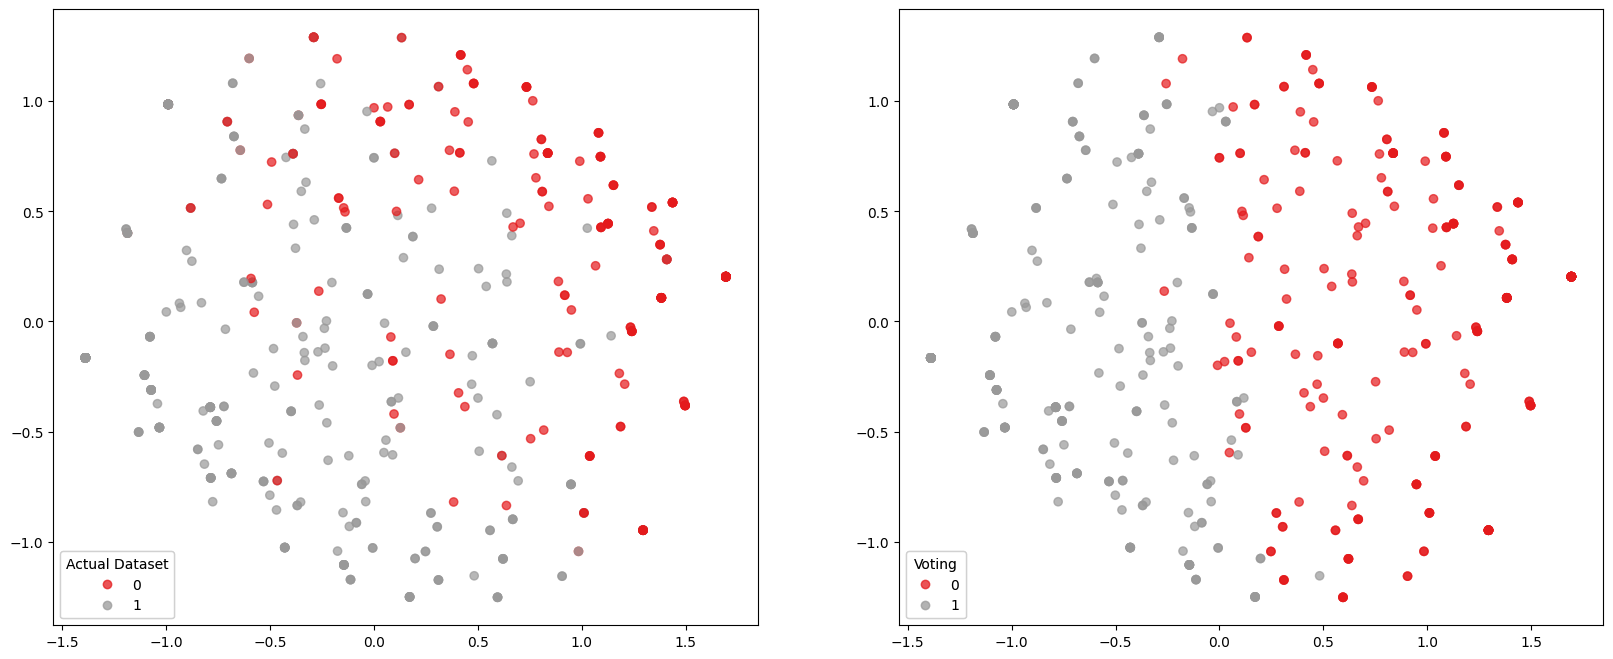

In [4]:
fi = get_frequent_itemsets(df, minsup=best_minsup)
df_new = make_cluster_df(df, fi)

print(f'Dataset:\t{dataset}')
print(f'Num. classes:\t{num_classes}')
print(f'Num. features:\t{df.shape[1]}')
print(f'Num. freq-itemsets:\t{fi.shape[0]}\n')

estimators = [
    AgglomerativeClustering(n_clusters=num_classes, linkage='average'),
    KMeans(n_clusters=num_classes, init='k-means++'),
    KModes(n_clusters=num_classes, init='Cao', verbose=0),
    GaussianMixture(n_components=num_classes),
    SpectralClustering(n_clusters=num_classes, affinity='nearest_neighbors')
]

estimator_names = ['agglomerative', 'kmeans', 'kmodes', 'gaussian', 'spectral']

vc = VotingClassifier(estimators, 'hard', estimator_names)
ip = vc.fit_predict(df_new, target)
votes = vc.voting(ip, num_classes, len(df_new), target)

evaluate_clusters(votes, target, df_new)
plot_clusters(estimator_names, ip, votes, df_new, target, plot_all=False)

# Dataset 2: KC2

In [5]:
dataset = 'kc2'
df, target, num_classes = load_data(name=dataset, normalize=False)

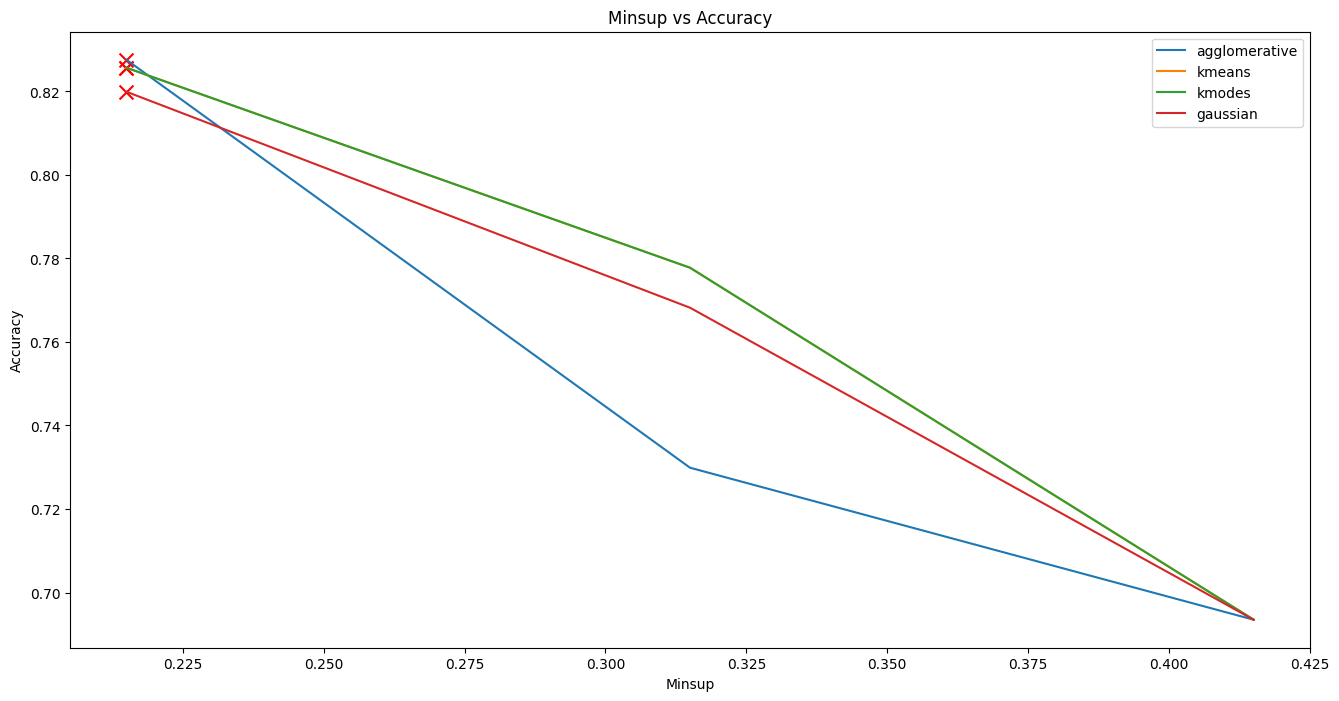

Best minsup found: 0.215



In [6]:
algos = ['agglomerative', 'kmeans', 'kmodes', 'gaussian']
minsup_values = np.arange(0.215, 0.8+0.2, 0.1)
best_minsup = tune_minsup(df, target, num_classes, minsup_values, algos)
print(f'Best minsup found: {best_minsup}\n')

Dataset:	kc2
Num. classes:	2
Num. features:	21
Num. freq-itemsets:	3216

Accuracy for voting classifier:	0.8257

V measure Score:	0.2030
Homogeneity Score:	0.1962
Completeness Score:	0.2103
Adj. Rand Score:	0.3605
Mutual Info Score:	0.1067
Adj. Mutual Info Score:	0.2015

Davies Bouldin Score:	0.2435
Silhouette Score:	0.8697


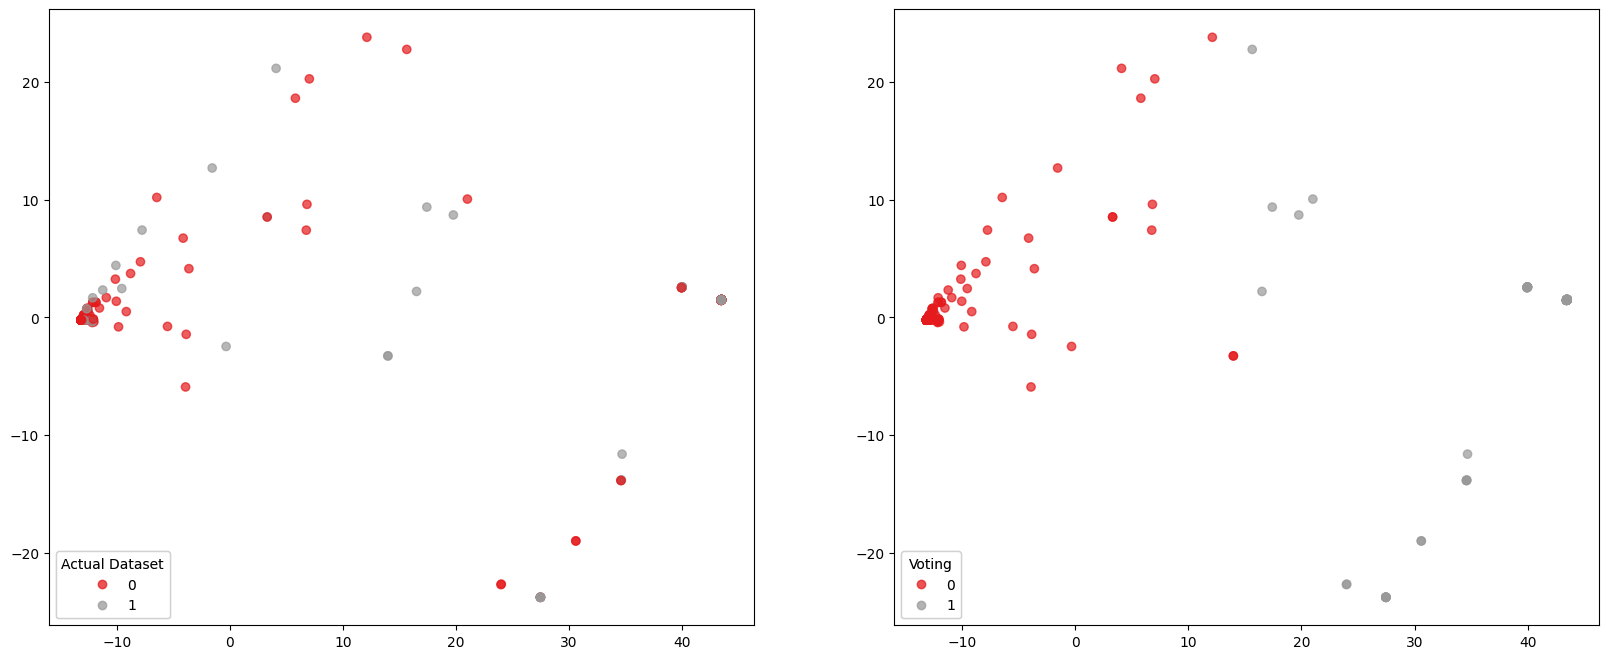

In [7]:
fi = get_frequent_itemsets(df, minsup=best_minsup)
df_new = make_cluster_df(df, fi)

print(f'Dataset:\t{dataset}')
print(f'Num. classes:\t{num_classes}')
print(f'Num. features:\t{df.shape[1]}')
print(f'Num. freq-itemsets:\t{fi.shape[0]}\n')

estimators = [
    AgglomerativeClustering(n_clusters=num_classes, linkage='average'),
    KMeans(n_clusters=num_classes, init='k-means++'),
    KModes(n_clusters=num_classes, init='Cao', verbose=0),
    GaussianMixture(n_components=num_classes),
    SpectralClustering(n_clusters=num_classes, affinity='nearest_neighbors')
]

estimator_names = ['agglomerative', 'kmeans', 'kmodes', 'gaussian', 'spectral']

vc = VotingClassifier(estimators, 'hard', estimator_names)
ip = vc.fit_predict(df_new, target)
votes = vc.voting(ip, num_classes, len(df_new), target)

evaluate_clusters(votes, target, df_new)
plot_clusters(estimator_names, ip, votes, df_new, target, plot_all=False)